In [150]:
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [19]:
path = './ledSpectralData/'
files = os.listdir(path)

files.sort()
files

['1a-red.csv',
 '1b-red.csv',
 '3a-orange.csv',
 '3b-orange.csv',
 '4a-yellow.csv',
 '4b-yellow.csv',
 '5a-yellowgreen.csv',
 '5b-yellowgreen.csv',
 '6a-green.csv',
 '6b-green.csv',
 '7a-blue.csv',
 '7b-blue.csv',
 '8a-uv.csv',
 '8b-uv.csv']

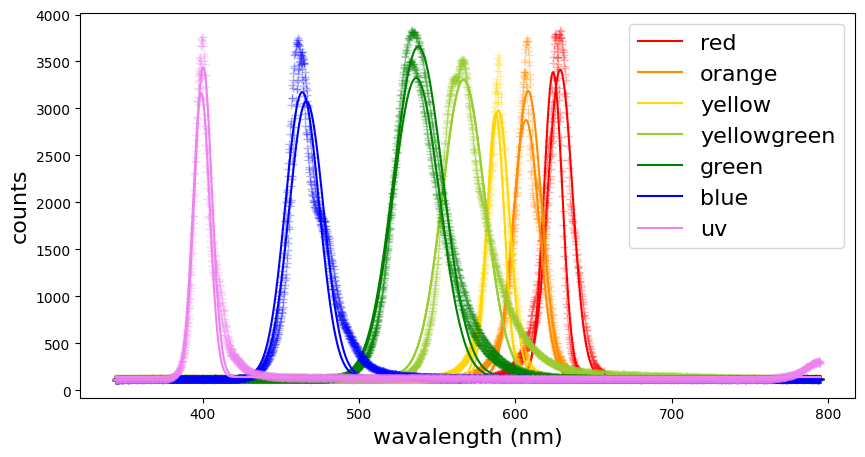

[626.4377659293922, 607.5157379187317, 588.3051348856279, 566.807047990862, 537.1858160330332, 464.91226121730176, 399.56268648972724]
[11.161379696920868, 12.204079177071854, 7.820614154536303, 19.301135863027955, 21.19431090177435, 15.308067126023552, 7.543756940943631]


In [291]:
# process colors
# other method: df['1'][np.argmax(df['2'])]

def gaussian_model(x, mu, sigma, a, b):
    return a * np.exp(-(x-mu)**2 / (2 * sigma**2)) + b

color_dict = {'red':'red', 'orange': 'darkorange', 'yellow':'gold','yellowgreen':'yellowgreen', 'green':'green', 'blue':'blue', 'uv':'violet'}
color_mu1, color_mu2, color_sig1, color_sig2 = [],[],[],[]

g = plt.figure(figsize=(10,5))

for i in range(len(files)):
    f = files[i]
    df = pd.read_csv(path+f, header=None, names=['1','2'])
    color = f.split('.')[0].split('-')[1]

    popt, pcov = curve_fit(gaussian_model,df['1'],df['2'],p0=[500,90,5000,0], maxfev=5000)
    fit_tmp = [gaussian_model(i, popt[0],popt[1],popt[2], popt[3]) for i in df['1']]

    if i % 2 != 0:
        label = color
        label_data = color+' Spectral data'
        label_fit = color+' Gaussian fit'
        color_mu1 += [popt[0]]
        color_sig1 += [popt[1]]
    else:
        label = label_data = label_fit =  "_nolegend_"
        color_mu2 += [popt[0]]
        color_sig2 += [popt[1]]
    
    plt.plot(df['1'],df['2'], '+' , color=color_dict[color], alpha=0.3)
    plt.plot(df['1'],fit_tmp, '-' , color=color_dict[color], label=label)

plt.xlabel('wavalength (nm)', fontsize=16)
plt.ylabel('counts', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('spectrum.pdf', bbox_inches='tight')
plt.show()

color_mu = [(i+j)/2 for i, j in zip(color_mu1,color_mu2)]
color_sig = [np.sqrt(i**2 + j**2) for i, j in zip(color_sig1, color_sig1)]

print(color_mu)
print(color_sig)


In [289]:
def seperate_arr(out):
    out1=np.array(out[:len(out)//2])
    out2=np.array(out[len(out)//2:])
    
    return out1, out2

In [321]:
def v0_finder1(out1, out2, plot=1, color='red'):
    out12 = (out1-out2)
    # i = np.where(out12>abs(np.min(out12)))[0][0]

    max_err = abs(np.min(out12))
    for j in range(len(out12)):
        if out12[j] <= max_err:
            i = j+1

    if plot:
        g = plt.figure(figsize=(5,3))
        plt.plot(out1, out12, '.')
        plt.plot([out1[i],out1[i]], [0,5])
        plt.yscale('log')
        plt.xlabel('Analog output for $V_{out,1}$')
        plt.ylabel('Analog output for $V_{out,1}-V_{out,2}$')
        plt.savefig('V0_plots/method1_'+color+'.pdf', bbox_inches='tight')
        plt.show()

        print('V0: by hand ', out1[i])    
    return out1[i], max_err

In [322]:
def v0_finder2(out1, out2, plot=1, drop_data=3/4, color='red'):
    def lin_model(x,a, b):
        return x*a+b

    out12 = (out1-out2)
    popt, pcov = curve_fit(lin_model, out1[int(len(out1)*drop_data):], out12[int(len(out1)*drop_data):])

    a, b = popt
    # x start at 
    x0 = -b/a
    x=np.linspace(x0, out1[-1],100)
    if plot:
        g = plt.figure(figsize=(5,3))
        plt.plot(out1, out12, '.')
        plt.plot(x, lin_model(x,a,b))
        plt.xlabel('Analog output for $V_{out,1}$')
        plt.ylabel('Analog output for $V_{out,1}-V_{out,2}$')
        plt.savefig('V0_plots/method2_'+color+'.pdf', bbox_inches='tight')
        plt.show()

        print('V0: by fit ', x0)
    
    err = np.sqrt(np.diag(pcov))
    return x0, err

In [58]:
# relationship from lab1
def trans_num_to_v(n):
    return 0.00476658 + 0.01979524*n


def not_really_calc(n, wavelength=606 * 10 ** (-9)):

    c = (3*10**8)
    # wavelength unit:nm
    freq = c/wavelength

    return trans_num_to_v(91) / freq * (1.6*10**(-19))

In [59]:
#yellow LED, delay = 100
ydata1 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 34, 35, 36, 37, 38, 40, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 64, 65, 66, 67, 68, 69, 70, 72, 72, 73, 75, 75, 76, 77, 80, 80, 80, 81, 82, 83, 85, 85, 86, 87, 87, 88, 89, 89, 90, 91, 91, 92, 92, 93, 93, 94, 95, 95, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 108, 109, 109, 110, 110, 111, 112, 112, 113, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 118, 119, 119, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 126, 127, 127, 128, 128, 129, 130, 130, 131, 131, 132, 132, 132, 133, 133, 134, 135, 135, 136, 136, 137, 137, 137, 138, 138, 139, 139, 140, 141, 141, 142, 142, 143, 143, 143, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 156, 157, 157, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 163, 164, 164, 165, 165, 166, 166, 167, 167, 168, 168, 169, 169, 170, 170, 171, 171, 172, 172, 173, 173, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 66, 68, 69, 70, 70, 71, 73, 73, 75, 75, 76, 77, 78, 79, 80, 81, 82, 83, 83, 84, 85, 85, 86, 86, 87, 87, 87, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 92, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94]
ydata2 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 34, 35, 36, 37, 38, 40, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 67, 68, 69, 70, 72, 72, 73, 74, 75, 76, 77, 80, 80, 80, 81, 82, 83, 85, 85, 86, 87, 87, 88, 89, 89, 90, 91, 91, 92, 92, 93, 94, 94, 95, 95, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 108, 109, 109, 110, 111, 111, 112, 112, 113, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 118, 119, 119, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 127, 127, 127, 128, 128, 129, 130, 130, 131, 131, 132, 132, 132, 133, 133, 134, 135, 135, 136, 136, 137, 137, 137, 138, 138, 139, 139, 140, 141, 141, 142, 142, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 157, 158, 159, 159, 160, 160, 161, 161, 162, 162, 162, 163, 163, 164, 164, 165, 165, 166, 166, 167, 167, 168, 168, 169, 169, 170, 170, 171, 171, 172, 172, 173, 173, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 66, 68, 69, 70, 70, 71, 73, 74, 75, 75, 76, 77, 78, 79, 80, 81, 82, 83, 83, 84, 85, 85, 86, 86, 87, 87, 87, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 92, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 95]
ydata3 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 34, 35, 36, 37, 38, 40, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 64, 65, 66, 67, 68, 69, 70, 72, 72, 73, 74, 75, 76, 77, 80, 80, 80, 81, 82, 83, 85, 85, 86, 87, 87, 88, 89, 89, 90, 91, 91, 92, 92, 93, 94, 94, 95, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 108, 109, 109, 110, 111, 111, 112, 112, 113, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 118, 119, 119, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 126, 127, 127, 128, 128, 129, 130, 130, 131, 131, 132, 132, 132, 133, 133, 134, 135, 135, 136, 136, 137, 137, 137, 138, 138, 139, 139, 140, 141, 141, 142, 142, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 157, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 164, 164, 164, 165, 165, 166, 166, 167, 167, 168, 168, 169, 169, 170, 170, 171, 171, 172, 172, 173, 173, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 66, 68, 69, 70, 70, 71, 73, 73, 75, 75, 76, 77, 78, 79, 80, 81, 82, 83, 83, 84, 85, 85, 86, 86, 87, 87, 87, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 92, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94]

#green
gdata1 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 34, 35, 36, 37, 38, 40, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 75, 76, 77, 80, 80, 80, 81, 82, 83, 86, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 97, 98, 100, 101, 102, 103, 104, 104, 105, 106, 107, 107, 108, 109, 109, 110, 111, 111, 112, 113, 113, 114, 115, 115, 116, 116, 117, 118, 118, 119, 119, 120, 121, 121, 122, 122, 123, 123, 124, 125, 125, 126, 126, 127, 127, 128, 128, 129, 130, 130, 130, 131, 131, 132, 133, 133, 134, 134, 135, 135, 136, 137, 137, 138, 138, 139, 139, 140, 140, 141, 141, 142, 142, 143, 143, 144, 144, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 155, 155, 155, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 164, 165, 165, 165, 166, 166, 167, 168, 168, 169, 169, 169, 170, 171, 171, 172, 172, 173, 173, 174, 174, 175, 175, 176, 176, 177, 177, 178, 178, 179, 179, 180, 180, 181, 181, 182, 182, 183, 183, 184, 184, 185, 185, 186, 186, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 66, 68, 68, 70, 71, 71, 73, 74, 75, 76, 76, 77, 78, 80, 81, 81, 83, 83, 84, 85, 86, 88, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 98, 99, 100, 101, 102, 103, 104, 105, 105, 106, 106, 107, 107, 108, 108, 108, 108, 109, 109, 109, 109, 110, 110, 110, 110, 110, 111, 111, 111, 111, 111, 111, 112, 112, 112, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 113, 114, 113, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 116, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 119, 120, 120, 120, 120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121, 121]
gdata2 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 34, 35, 36, 37, 38, 40, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 64, 65, 66, 67, 68, 69, 70, 72, 73, 73, 74, 75, 76, 77, 80, 80, 81, 81, 83, 83, 86, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 95, 96, 97, 98, 100, 101, 102, 103, 104, 104, 105, 106, 107, 107, 108, 109, 110, 110, 111, 111, 112, 113, 114, 114, 115, 115, 116, 116, 117, 118, 118, 119, 119, 120, 121, 121, 122, 122, 123, 123, 124, 125, 125, 126, 126, 127, 127, 128, 128, 129, 130, 130, 131, 131, 131, 132, 133, 133, 134, 134, 135, 135, 136, 137, 137, 138, 138, 139, 139, 140, 140, 141, 141, 142, 143, 143, 143, 144, 144, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 151, 152, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 164, 165, 165, 165, 166, 167, 167, 168, 168, 169, 169, 169, 170, 171, 171, 172, 172, 173, 173, 174, 174, 175, 175, 176, 176, 177, 177, 178, 178, 179, 179, 180, 180, 181, 181, 182, 182, 183, 183, 184, 184, 185, 185, 186, 186, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 37, 38, 39, 40, 41, 42, 44, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 66, 68, 69, 69, 70, 71, 73, 74, 75, 75, 76, 77, 78, 80, 81, 81, 82, 83, 84, 86, 87, 88, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 99, 100, 101, 102, 103, 104, 105, 105, 106, 106, 107, 107, 108, 108, 108, 108, 109, 109, 109, 110, 110, 110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 112, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 113, 113, 113, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 119, 120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121]
gdata3 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 27, 28, 29, 30, 31, 32, 34, 34, 35, 36, 37, 38, 40, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 75, 76, 77, 80, 80, 80, 81, 82, 83, 86, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 95, 97, 97, 99, 100, 101, 102, 103, 104, 104, 105, 106, 107, 107, 108, 109, 110, 110, 111, 111, 112, 113, 114, 114, 115, 115, 116, 116, 117, 118, 118, 119, 119, 120, 121, 121, 122, 122, 123, 124, 124, 125, 125, 126, 126, 127, 127, 128, 128, 129, 130, 130, 131, 131, 131, 132, 133, 133, 134, 134, 135, 135, 136, 137, 137, 138, 138, 139, 139, 140, 140, 141, 141, 142, 143, 143, 143, 144, 144, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 151, 152, 152, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 164, 164, 165, 165, 166, 166, 167, 167, 168, 168, 169, 169, 169, 170, 171, 171, 172, 172, 173, 173, 174, 174, 175, 175, 176, 176, 177, 177, 178, 178, 179, 179, 180, 180, 181, 181, 182, 182, 183, 183, 184, 184, 185, 185, 186, 186, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 66, 68, 68, 70, 70, 71, 73, 73, 75, 75, 76, 77, 78, 80, 81, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 97, 98, 99, 100, 101, 102, 103, 104, 105, 105, 106, 106, 107, 107, 108, 108, 108, 108, 109, 109, 109, 109, 110, 110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 112, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 113, 113, 113, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 119, 120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121]

#orange
odata1 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 34, 35, 36, 37, 38, 40, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 67, 68, 69, 70, 72, 72, 73, 74, 75, 76, 77, 80, 80, 80, 81, 82, 83, 85, 85, 85, 86, 87, 88, 88, 89, 89, 90, 91, 91, 92, 92, 93, 94, 94, 95, 95, 96, 96, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 103, 104, 105, 105, 106, 106, 106, 107, 108, 108, 109, 109, 110, 110, 111, 111, 112, 112, 113, 113, 114, 115, 115, 115, 116, 116, 117, 118, 118, 119, 119, 120, 120, 120, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 126, 127, 127, 128, 128, 129, 129, 130, 130, 131, 131, 132, 132, 133, 133, 134, 134, 135, 136, 136, 136, 137, 137, 138, 138, 139, 140, 140, 140, 141, 142, 142, 142, 143, 143, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 156, 157, 157, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 164, 164, 165, 165, 165, 166, 167, 167, 167, 168, 168, 169, 169, 170, 170, 171, 171, 172, 172, 173, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 66, 68, 69, 69, 70, 71, 73, 74, 75, 75, 76, 77, 78, 79, 80, 81, 82, 82, 83, 84, 84, 85, 85, 85, 86, 86, 86, 86, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94]
odata2 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 34, 35, 36, 37, 38, 40, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 64, 65, 66, 67, 68, 69, 70, 72, 72, 73, 74, 75, 76, 77, 80, 80, 80, 81, 82, 83, 85, 85, 85, 86, 87, 88, 88, 89, 89, 90, 91, 91, 92, 92, 93, 94, 94, 95, 95, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 104, 104, 105, 105, 106, 106, 106, 107, 108, 108, 109, 109, 110, 110, 111, 111, 112, 112, 113, 113, 114, 115, 115, 115, 116, 116, 117, 118, 118, 119, 119, 120, 120, 120, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 126, 127, 127, 128, 128, 129, 129, 130, 130, 131, 131, 132, 132, 133, 133, 134, 134, 135, 136, 136, 136, 137, 137, 138, 138, 139, 140, 140, 141, 141, 142, 142, 142, 143, 143, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 156, 157, 157, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 164, 164, 165, 165, 166, 166, 167, 167, 168, 168, 168, 169, 169, 170, 170, 171, 171, 172, 172, 173, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 66, 68, 68, 69, 70, 71, 73, 73, 75, 75, 76, 77, 78, 79, 80, 81, 82, 82, 83, 84, 84, 85, 85, 85, 86, 86, 86, 86, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 92, 93, 93, 93, 93, 93, 93, 93, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 92, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94]
odata3 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 63, 64, 66, 66, 67, 68, 69, 70, 72, 73, 73, 74, 76, 76, 78, 79, 79, 80, 81, 82, 83, 84, 84, 85, 86, 87, 88, 88, 89, 89, 90, 91, 91, 92, 92, 93, 94, 94, 95, 95, 96, 96, 97, 98, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 103, 104, 105, 105, 105, 106, 107, 107, 108, 108, 109, 109, 110, 110, 111, 111, 112, 112, 113, 114, 114, 115, 115, 116, 116, 116, 117, 118, 118, 118, 119, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 125, 127, 127, 128, 128, 129, 129, 130, 130, 131, 132, 132, 133, 133, 133, 134, 134, 135, 136, 136, 136, 137, 138, 138, 139, 139, 140, 140, 141, 141, 142, 142, 142, 143, 144, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 147, 150, 151, 151, 151, 152, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 161, 162, 163, 163, 164, 164, 165, 164, 165, 166, 167, 167, 167, 168, 168, 169, 169, 170, 170, 171, 171, 172, 172, 173, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 59, 61, 61, 63, 64, 65, 65, 66, 67, 69, 70, 71, 72, 72, 73, 74, 76, 76, 78, 78, 79, 80, 81, 82, 82, 83, 84, 84, 85, 85, 85, 86, 86, 86, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94]

#red
rdata1 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 63, 65, 66, 66, 67, 68, 69, 70, 71, 73, 73, 74, 75, 76, 77, 78, 79, 80, 80, 81, 82, 83, 83, 84, 85, 85, 86, 86, 87, 88, 88, 89, 90, 90, 91, 91, 92, 92, 93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 103, 104, 104, 105, 106, 106, 107, 107, 108, 108, 109, 109, 110, 110, 111, 111, 112, 113, 113, 113, 114, 114, 115, 116, 116, 117, 117, 117, 118, 119, 119, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 124, 125, 126, 126, 127, 127, 128, 129, 129, 129, 131, 130, 131, 132, 132, 132, 133, 134, 134, 135, 135, 136, 136, 136, 137, 138, 138, 139, 139, 140, 140, 141, 141, 142, 142, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147, 148, 146, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 163, 164, 165, 165, 166, 166, 167, 167, 167, 168, 169, 169, 170, 170, 171, 171, 172, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 59, 61, 61, 63, 64, 65, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 75, 77, 77, 78, 79, 79, 80, 80, 80, 81, 81, 82, 82, 82, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91]
rdata2 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 64, 64, 66, 66, 67, 68, 69, 70, 71, 73, 73, 74, 75, 76, 77, 78, 79, 80, 80, 81, 82, 83, 83, 84, 85, 85, 86, 86, 87, 88, 88, 89, 90, 90, 91, 91, 92, 92, 93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 104, 104, 104, 105, 106, 106, 107, 107, 108, 108, 109, 109, 110, 110, 111, 111, 112, 113, 113, 114, 114, 114, 115, 116, 116, 117, 117, 117, 118, 119, 119, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 124, 125, 126, 126, 127, 127, 128, 129, 129, 129, 131, 130, 131, 132, 132, 132, 133, 134, 134, 135, 135, 136, 136, 136, 137, 138, 138, 139, 139, 140, 140, 141, 141, 142, 142, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147, 148, 146, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 163, 164, 165, 165, 166, 166, 167, 167, 168, 168, 169, 169, 170, 170, 171, 171, 172, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 59, 61, 61, 62, 64, 65, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 75, 77, 77, 78, 79, 79, 80, 80, 81, 81, 81, 82, 82, 82, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91]
rdata3 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 63, 65, 66, 66, 67, 68, 69, 70, 71, 73, 73, 74, 75, 76, 77, 78, 79, 80, 80, 81, 82, 83, 83, 84, 85, 85, 86, 86, 87, 88, 88, 89, 90, 90, 91, 91, 92, 93, 93, 94, 94, 95, 95, 96, 96, 97, 97, 98, 99, 99, 100, 100, 101, 101, 102, 102, 103, 104, 104, 104, 105, 106, 106, 107, 107, 108, 108, 109, 109, 110, 110, 111, 111, 112, 113, 113, 114, 114, 114, 115, 116, 116, 117, 117, 117, 118, 119, 119, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 124, 125, 126, 126, 127, 127, 128, 129, 129, 130, 131, 130, 131, 132, 132, 132, 133, 134, 134, 135, 135, 136, 136, 136, 137, 138, 138, 139, 139, 140, 140, 141, 141, 142, 142, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147, 148, 146, 149, 149, 150, 150, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 163, 164, 165, 165, 166, 166, 167, 167, 168, 168, 169, 169, 170, 170, 171, 171, 172, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 59, 61, 61, 63, 64, 65, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 75, 77, 77, 78, 79, 79, 80, 80, 81, 81, 81, 82, 82, 82, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91]

#yellow green
ygdata1 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 63, 64, 66, 66, 67, 68, 70, 71, 72, 73, 73, 74, 76, 76, 78, 79, 79, 80, 81, 82, 83, 84, 85, 86, 86, 87, 88, 88, 89, 90, 90, 91, 92, 92, 93, 93, 94, 95, 95, 96, 96, 97, 97, 98, 99, 99, 100, 100, 101, 102, 102, 102, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 109, 109, 110, 110, 110, 111, 112, 112, 113, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 118, 119, 119, 120, 120, 121, 122, 122, 123, 123, 123, 124, 125, 125, 126, 126, 127, 126, 128, 128, 129, 129, 130, 130, 131, 131, 132, 133, 133, 133, 134, 134, 135, 135, 136, 136, 137, 137, 138, 139, 139, 140, 140, 140, 141, 142, 142, 143, 143, 143, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 148, 151, 152, 152, 152, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 162, 163, 163, 164, 165, 165, 166, 165, 166, 167, 168, 168, 169, 169, 169, 170, 170, 171, 171, 172, 172, 173, 173, 174, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 56, 57, 57, 58, 59, 61, 61, 63, 64, 65, 65, 66, 67, 69, 69, 71, 72, 72, 73, 74, 76, 76, 78, 78, 79, 80, 81, 82, 83, 84, 84, 85, 85, 86, 86, 87, 87, 87, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 95, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96]
ygdata2 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 64, 64, 66, 66, 67, 68, 69, 70, 72, 73, 73, 74, 76, 77, 78, 79, 79, 80, 81, 82, 83, 84, 85, 86, 86, 87, 88, 89, 89, 90, 90, 91, 92, 92, 93, 93, 94, 95, 95, 96, 96, 97, 98, 98, 99, 99, 100, 100, 101, 102, 102, 102, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 109, 109, 110, 110, 110, 111, 112, 112, 113, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 119, 119, 119, 120, 120, 121, 122, 122, 123, 123, 123, 124, 125, 125, 126, 126, 127, 126, 128, 128, 129, 129, 130, 130, 131, 131, 132, 133, 133, 133, 134, 134, 135, 135, 136, 136, 137, 137, 138, 139, 139, 140, 140, 140, 141, 142, 142, 143, 143, 143, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 148, 151, 152, 152, 152, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 162, 163, 164, 164, 165, 165, 166, 165, 166, 167, 168, 168, 169, 169, 169, 170, 170, 171, 172, 172, 172, 173, 173, 174, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 59, 61, 61, 63, 64, 65, 65, 66, 67, 68, 69, 71, 72, 72, 73, 75, 76, 76, 78, 78, 79, 80, 81, 82, 83, 84, 84, 85, 85, 86, 86, 87, 87, 87, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 95, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96]
ygdata3 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 64, 64, 66, 66, 67, 68, 69, 70, 72, 73, 73, 74, 76, 76, 78, 79, 79, 80, 81, 82, 83, 84, 85, 86, 86, 87, 88, 89, 89, 90, 90, 91, 92, 92, 93, 94, 94, 95, 95, 96, 97, 97, 98, 98, 99, 99, 100, 100, 101, 102, 102, 102, 103, 104, 104, 105, 105, 106, 106, 107, 107, 108, 109, 109, 110, 110, 110, 111, 112, 112, 113, 113, 114, 114, 115, 115, 116, 116, 117, 117, 118, 118, 119, 119, 120, 120, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 126, 127, 126, 128, 128, 129, 129, 130, 130, 131, 131, 132, 133, 133, 133, 134, 134, 135, 135, 136, 136, 137, 137, 138, 139, 139, 140, 140, 140, 141, 142, 142, 143, 143, 143, 144, 145, 145, 146, 146, 147, 147, 148, 148, 149, 149, 150, 150, 148, 151, 152, 152, 152, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 162, 163, 164, 164, 165, 165, 166, 165, 166, 167, 168, 168, 169, 169, 169, 170, 170, 171, 171, 172, 172, 173, 173, 174, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 60, 61, 61, 62, 64, 65, 65, 66, 67, 68, 70, 71, 72, 72, 73, 75, 76, 76, 78, 78, 79, 80, 81, 82, 83, 84, 84, 85, 85, 86, 86, 87, 87, 87, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 95, 95, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96]

#blue
bdata1 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 63, 64, 66, 66, 67, 68, 69, 71, 72, 73, 73, 74, 76, 77, 78, 79, 79, 81, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 121, 122, 123, 124, 125, 125, 126, 126, 127, 128, 128, 129, 130, 130, 131, 132, 132, 133, 133, 134, 134, 135, 135, 136, 136, 137, 137, 138, 139, 139, 140, 140, 141, 141, 142, 142, 143, 143, 144, 144, 144, 146, 146, 146, 147, 148, 148, 149, 149, 150, 151, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 160, 160, 160, 161, 161, 162, 163, 163, 164, 164, 165, 165, 166, 166, 167, 167, 167, 168, 166, 169, 170, 170, 170, 171, 172, 172, 173, 173, 173, 174, 175, 175, 176, 176, 176, 177, 178, 178, 178, 179, 179, 180, 180, 181, 181, 182, 182, 183, 183, 183, 184, 185, 185, 186, 186, 187, 187, 188, 188, 189, 189, 190, 190, 191, 191, 192, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 60, 61, 61, 63, 64, 65, 65, 67, 67, 68, 70, 71, 72, 72, 73, 75, 76, 76, 78, 78, 80, 81, 82, 83, 84, 84, 86, 87, 88, 88, 89, 91, 92, 93, 94, 95, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 119, 120, 121, 122, 122, 123, 123, 124, 124, 124, 125, 124, 125, 125, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 131, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132]
bdata2 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 63, 64, 66, 66, 67, 68, 69, 70, 72, 73, 73, 74, 76, 77, 78, 79, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 121, 122, 123, 124, 125, 125, 126, 126, 127, 128, 129, 129, 130, 130, 131, 132, 132, 133, 133, 134, 134, 135, 136, 136, 137, 137, 137, 138, 139, 139, 140, 140, 141, 141, 142, 142, 143, 143, 144, 144, 144, 146, 146, 146, 147, 148, 148, 149, 149, 150, 151, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 156, 157, 157, 158, 158, 159, 160, 160, 160, 161, 161, 162, 163, 163, 163, 164, 165, 165, 166, 166, 167, 167, 168, 168, 166, 169, 170, 170, 170, 171, 172, 172, 173, 173, 174, 174, 175, 175, 176, 176, 177, 177, 178, 178, 178, 179, 179, 180, 180, 181, 182, 182, 182, 183, 183, 183, 184, 185, 185, 186, 186, 187, 187, 188, 188, 189, 189, 190, 190, 191, 191, 192, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 59, 61, 61, 63, 64, 65, 65, 66, 67, 68, 69, 71, 72, 72, 73, 75, 76, 76, 78, 79, 80, 81, 82, 83, 84, 84, 85, 87, 88, 88, 89, 91, 92, 93, 94, 95, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 119, 120, 121, 122, 122, 123, 123, 124, 124, 124, 125, 125, 125, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 131, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132]
bdata3 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 63, 64, 66, 66, 67, 68, 69, 71, 72, 73, 73, 75, 76, 77, 78, 79, 80, 81, 81, 83, 84, 85, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 121, 122, 123, 124, 125, 125, 126, 126, 127, 128, 129, 129, 130, 130, 131, 132, 132, 133, 133, 134, 134, 135, 136, 136, 137, 137, 137, 138, 139, 139, 140, 140, 141, 141, 142, 143, 143, 144, 144, 144, 144, 146, 146, 146, 147, 148, 148, 149, 149, 150, 151, 151, 151, 152, 152, 153, 153, 154, 154, 155, 155, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 161, 162, 163, 163, 164, 164, 165, 165, 166, 166, 167, 167, 168, 168, 166, 169, 170, 170, 170, 171, 172, 172, 173, 173, 174, 174, 175, 175, 176, 176, 177, 177, 178, 178, 179, 179, 180, 180, 181, 181, 182, 182, 183, 183, 184, 183, 184, 185, 186, 186, 187, 187, 188, 188, 189, 189, 190, 190, 190, 191, 191, 192, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 23, 24, 25, 26, 27, 28, 30, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 59, 61, 61, 62, 64, 65, 65, 66, 67, 68, 69, 71, 72, 72, 74, 75, 76, 76, 78, 79, 80, 81, 82, 83, 84, 84, 85, 87, 88, 88, 89, 91, 92, 93, 94, 95, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 119, 120, 121, 122, 122, 123, 123, 124, 124, 124, 125, 124, 125, 125, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 131, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132]

#purple
pdata1 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 63, 64, 66, 66, 67, 68, 69, 71, 72, 73, 73, 74, 76, 77, 78, 79, 80, 80, 81, 83, 84, 85, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 140, 141, 142, 143, 144, 144, 145, 145, 146, 147, 148, 148, 149, 149, 150, 150, 151, 152, 152, 153, 153, 153, 154, 155, 155, 156, 156, 157, 158, 158, 159, 160, 160, 160, 161, 161, 162, 162, 163, 163, 164, 164, 165, 165, 166, 166, 167, 167, 168, 169, 169, 169, 170, 170, 171, 171, 172, 173, 173, 174, 174, 175, 175, 176, 176, 177, 177, 175, 178, 179, 179, 179, 180, 181, 181, 182, 182, 183, 183, 184, 184, 185, 185, 186, 186, 187, 187, 188, 188, 188, 189, 189, 190, 190, 191, 191, 192, 192, 192, 193, 194, 194, 195, 195, 196, 196, 197, 197, 198, 198, 199, 199, 200, 200, 201, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 59, 61, 61, 62, 64, 65, 65, 66, 67, 68, 70, 71, 72, 72, 73, 75, 76, 76, 78, 79, 80, 81, 82, 83, 84, 84, 85, 87, 88, 88, 89, 91, 92, 93, 94, 95, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 130, 132, 133, 134, 135, 136, 137, 138, 138, 139, 140, 141, 141, 142, 142, 143, 143, 143, 144, 144, 144, 144, 145, 144, 145, 145, 145, 145, 146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147, 147, 147, 147, 147, 147, 146, 147, 147, 147, 147, 147, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 147, 148, 148, 148, 148, 148, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 149, 150, 150, 150, 150, 150, 150, 150, 150, 150]
pdata2 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 63, 65, 66, 66, 67, 68, 69, 71, 72, 73, 73, 74, 76, 77, 78, 79, 79, 81, 81, 83, 84, 85, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 140, 141, 142, 143, 144, 144, 145, 146, 146, 147, 148, 148, 149, 149, 150, 150, 151, 152, 152, 153, 153, 153, 154, 155, 155, 156, 157, 157, 158, 158, 159, 160, 160, 160, 161, 161, 162, 162, 163, 163, 164, 164, 165, 166, 166, 167, 167, 168, 168, 169, 169, 170, 170, 170, 171, 172, 172, 173, 173, 174, 174, 175, 175, 176, 176, 177, 177, 175, 178, 179, 179, 179, 180, 181, 181, 182, 182, 183, 183, 184, 184, 185, 185, 186, 186, 187, 187, 188, 188, 188, 189, 189, 190, 191, 191, 191, 192, 192, 192, 193, 194, 194, 195, 195, 196, 196, 197, 197, 198, 198, 199, 199, 200, 200, 201, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 56, 57, 57, 58, 60, 61, 61, 63, 64, 65, 65, 66, 67, 69, 70, 71, 72, 72, 73, 75, 76, 76, 78, 78, 80, 81, 82, 83, 84, 84, 86, 87, 88, 88, 89, 91, 92, 93, 94, 95, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 130, 132, 133, 134, 135, 136, 137, 138, 138, 139, 140, 141, 141, 142, 142, 143, 143, 144, 144, 144, 144, 145, 145, 144, 145, 145, 146, 145, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 149, 147, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 150, 149, 149, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 149, 150, 150, 150, 150, 150, 150, 150, 150, 150]
pdata3 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 61, 61, 62, 63, 65, 66, 66, 67, 68, 69, 71, 72, 73, 73, 74, 76, 77, 78, 79, 79, 80, 81, 83, 84, 85, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 140, 141, 142, 143, 144, 144, 145, 146, 146, 147, 148, 148, 149, 149, 150, 150, 151, 152, 152, 153, 153, 153, 155, 155, 155, 156, 157, 157, 158, 158, 159, 160, 160, 160, 161, 161, 162, 162, 163, 163, 164, 164, 165, 166, 166, 167, 167, 167, 168, 169, 169, 170, 170, 170, 171, 172, 172, 173, 173, 174, 174, 175, 175, 176, 176, 177, 177, 175, 178, 179, 179, 179, 180, 181, 181, 182, 182, 183, 183, 184, 184, 185, 185, 186, 186, 187, 187, 188, 188, 189, 189, 189, 190, 190, 191, 191, 192, 192, 192, 193, 194, 194, 195, 195, 196, 196, 197, 197, 198, 198, 199, 199, 200, 200, 201, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 56, 57, 57, 58, 59, 61, 61, 63, 64, 65, 65, 66, 67, 68, 70, 71, 72, 72, 73, 75, 76, 76, 78, 78, 80, 81, 82, 83, 84, 84, 86, 87, 88, 88, 90, 91, 92, 93, 94, 95, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 130, 132, 133, 134, 135, 136, 137, 138, 138, 139, 140, 141, 141, 142, 142, 143, 143, 144, 144, 144, 144, 145, 145, 144, 145, 145, 146, 145, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 149, 147, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 149, 150, 150, 150, 150, 150, 150, 150, 150, 150]

In [60]:
data = {'r1':rdata1, 'r2':rdata2, 'r3':rdata3,
        'o1':odata1, 'o2':odata2, 'o3':odata3,
        'y1':ydata1, 'y2':ydata2, 'y3':ydata3,
        'yg1':ygdata1, 'yg2':ygdata2, 'yg3':ygdata3,
        'g1':gdata1, 'g2':gdata2, 'g3':gdata3,
        'b1':bdata1, 'b2':bdata2, 'b3':bdata3,
        'u1':pdata1, 'u2':pdata2, 'u3':pdata3
        }


df_out = pd.DataFrame(data=data)
df_out[-6:]

,r1,r2,r3,o1,o2,o3,y1,y2,y3,yg1,...,yg3,g1,g2,g3,b1,b2,b3,u1,u2,u3
506,91,91,91,94,94,94,94,94,94,96,...,96,121,121,121,132,132,132,150,150,150
507,91,91,91,94,94,94,94,94,94,96,...,96,121,121,121,132,132,132,150,150,150
508,91,91,91,94,94,94,94,94,94,96,...,96,121,121,121,132,132,132,150,150,150
509,91,91,91,94,94,94,94,94,94,96,...,96,121,121,121,132,132,132,150,150,150
510,91,91,91,94,94,94,94,94,94,96,...,96,121,121,121,132,132,132,150,150,150
511,91,91,91,94,94,94,94,95,94,96,...,96,121,121,121,132,132,132,150,150,150


In [327]:
print(list(color_dict.keys()))

['red', 'orange', 'yellow', 'yellowgreen', 'green', 'blue', 'uv']


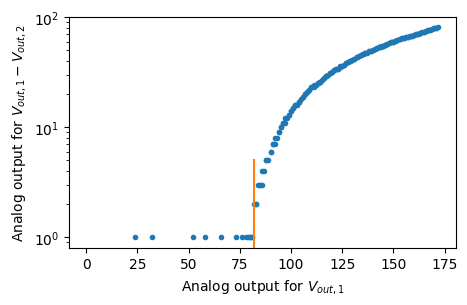

V0: by hand  82


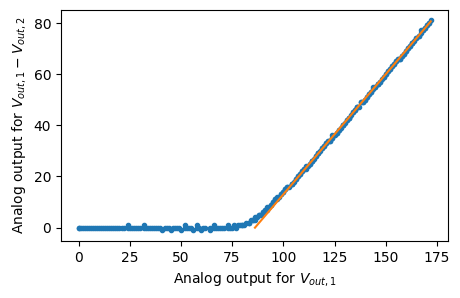

V0: by fit  86.15063283564108


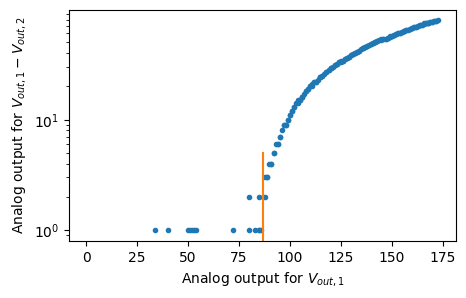

V0: by hand  87


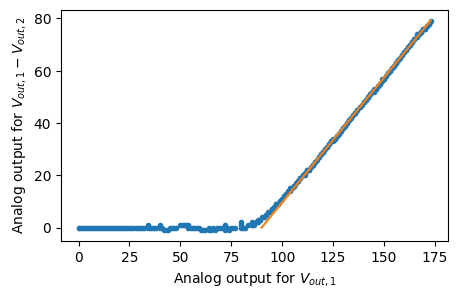

V0: by fit  89.90436054689845


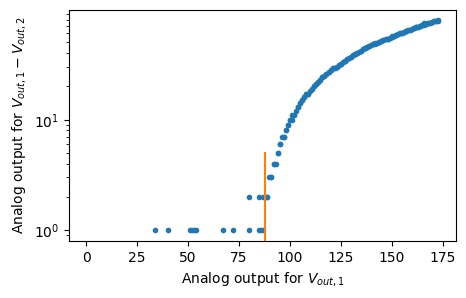

V0: by hand  88


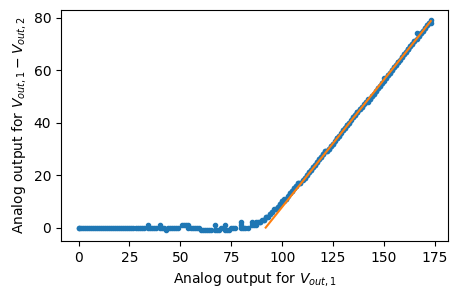

V0: by fit  91.9201776865842


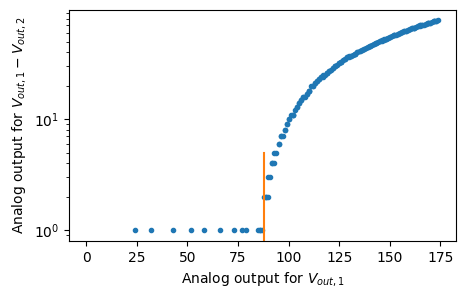

V0: by hand  88


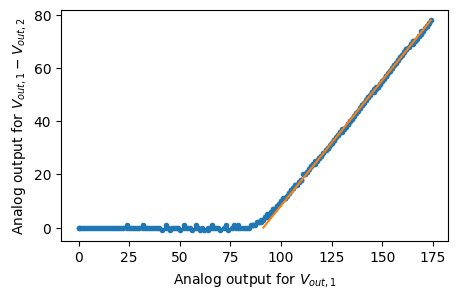

V0: by fit  91.28821237789232


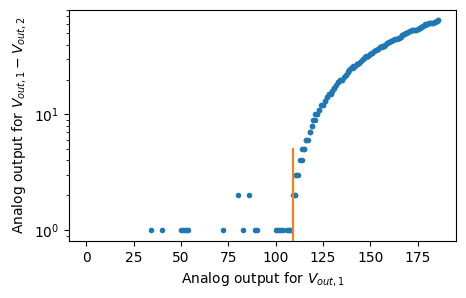

V0: by hand  109


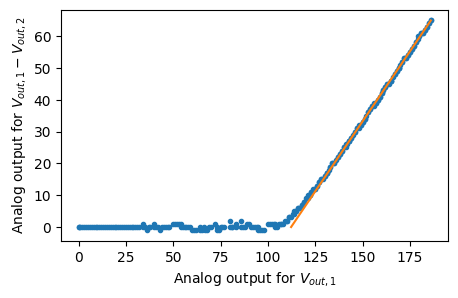

V0: by fit  112.24160753162523


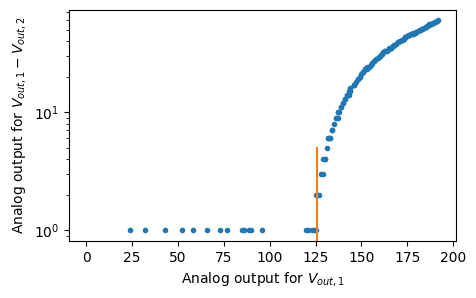

V0: by hand  126


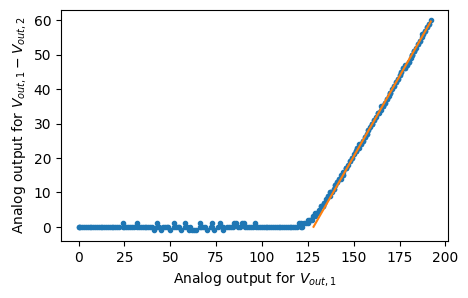

V0: by fit  128.0971854670499


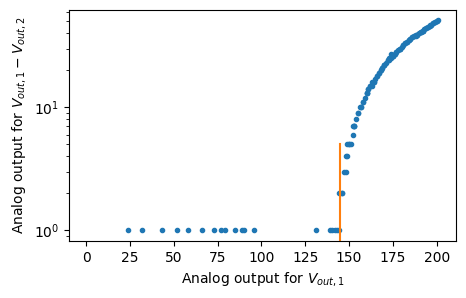

V0: by hand  145


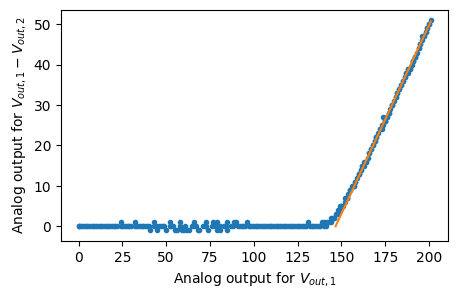

V0: by fit  146.699687357915


In [323]:
mean1, std1, mean2, std2 = [],[],[],[]


for color_i in range(7):
    v0_1, err1, v0_2, err2 = [], [], [], []
    drop_data = 0.5+color_i/6/4

    for i in range(3):
        i += color_i * 3
        col = df_out.columns[i]
        out1, out2 = seperate_arr(df_out[col])
        color_name = list(color_dict.keys())[color_i]
        v0_1_tmp, err1_tmp = v0_finder1(out1, out2, plot=i%3%2,color=color_name)
        v0_2_tmp, err2_tmp = v0_finder2(out1, out2, plot=i%3%2, drop_data=drop_data, color=color_name)
        v0_1 += [v0_1_tmp]
        err1 += [err1_tmp]
        v0_2 += [v0_2_tmp]
        err2 += [err2_tmp]
    
    mean1 += [np.average(v0_1)]
    #std1 += [np.std(v0_1)]
    std1 += [np.sqrt(np.sum(np.array(err1)**2))]
    mean2 += [np.average(v0_2)]
    #std2 += [np.std(v0_2)]
    std2 += [np.sqrt(np.sum(np.array(err2)**2))]
    '''print(col)
    print('mean and std for method1: ', np.average(v0_1), np.std(v0_1))
    print('mean and std for method2: ', np.average(v0_2), np.std(v0_2))'''



In [130]:
 # fit error and residuals
mean1, std1, mean2, std2 = ([82.0, 87.0, 88.0, 88.33333333333333, 109.33333333333333, 126.0, 145.0],
[1.7320508075688772,
1.7320508075688772,
1.7320508075688772,
1.7320508075688772,
1.7320508075688772,
1.7320508075688772,
1.7320508075688772],
[86.16627571960741,
89.85713382603534,
91.91998786443601,
91.25526254218492,
112.2383459262229,
128.11497445966165,
146.54170854039776],
[0.4034590618481021,
0.436542976052984,
0.5838566012046846,
0.6053652313617798,
0.7717094436448169,
0.9972399417099893,
1.6144083715783142])

In [332]:
# from std of 3 run

mean1, std1, mean2, std2 = ([82.0, 87.0, 88.0, 88.33333333333333, 109.33333333333333, 126.0, 145.0],
[0.0, 0.0, 0.0, 0.4714045207910317, 0.4714045207910317, 0.0, 0.0],
[86.16627571960741,
89.85713382603534,
91.91998786443601,
91.25526254218492,
112.2383459262229,
128.11497445966165,
146.54170854039776],
[0.05462734052123695,
0.03593262171108383,
0.04217753869849721,
0.02354486857563074,
0.1155916075349329,
0.017288373554677813,
0.21851474371670626])

In [331]:
print(mean1, std1, v_arr1, v_err1)

[82.0, 87.0, 88.0, 88.33333333333333, 109.33333333333333, 126.0, 145.0] [1.7320508075688772, 1.7320508075688772, 1.7320508075688772, 1.7320508075688772, 1.7320508075688772, 1.7320508075688772, 1.7320508075688772] [1.62797626, 1.72695246, 1.7467477, 1.7533461133333332, 2.169046153333333, 2.4989668199999997, 2.87507638] [0.0009215252929178114, 0.0009215252929178114, 0.0009215252929178114, 0.005415634306888062, 0.004409005986741996, 0.0009215252929178114, 0.0009215252929178114]


In [259]:
# wavelength to freq with error
f_arr = [(3*10**8) / (w * 10 ** (-9)) for w in color_mu]
f_err = [i/j*k for i,j,k in zip(color_sig, color_mu, f_arr)]

# v_0 from method 1
v_arr1 = [trans_num_to_v(n) for n in mean1]
#v_err1 = [0.01979524*(n) for n in std1]
v_err1 = [np.sqrt((j/i)**2+(5.77951570e-06/0.01979524)**2 +(8.74051114e-04)**2) for i,j in zip(mean1, std1)]

# v_0 from method 2
v_arr2 = [trans_num_to_v(n) for n in mean2]
#v_err2 = [0.01979524*(n) for n in std2]
v_err2 = [np.sqrt((j/i)**2+(5.77951570e-06/0.01979524)**2 +(8.74051114e-04)**2) for i,j in zip(mean1, std1)]

from numpy.polynomial import polynomial as P

def lin_model(x,a, b):
    return x*a/(1.6*10**(-19))+b


In [284]:
def final_plotter(v_arr=v_arr1, v_err=v_err1, f_arr=f_arr, f_err=f_err, w=[1]*7, name="lin.pdf"):
    popt = P.polyfit(f_arr, v_arr, 1,w=w,full=0)
    aopt, acov = curve_fit(lin_model, f_arr, v_arr, p0=[6*10**(-34),-0.5])

    g = plt.figure(figsize=(6,4.5))

    upperframe = g.add_axes((.1,.3,.8,.6))
    arr = np.linspace(4.5e14,7.7e14,10)
    fit_arr = [popt[0]+i*popt[1] for i in arr]
    plt.errorbar(f_arr, v_arr, v_err, f_err,fmt=".",capsize=2, label='data')
    plt.plot(arr, fit_arr, label='fit')
    plt.ylabel('Trun-on Voltage $V_0$ (V)', fontsize=13)
    plt.legend(fontsize=13)
    upperframe.set_xticklabels([])

    lowerframe = g.add_axes((.1,.1,.8,.2)) 
    fit_arr = [popt[0]+i*popt[1] for i in f_arr]
    res = [i-j for i,j in zip(v_arr, fit_arr)]
    y_err = [i/j*k for i,j,k in zip(f_err,f_arr,v_arr)]
    plt.errorbar(f_arr, res, y_err, v_err, fmt=".",capsize=2, label='data')
    plt.plot(arr, np.zeros(len(arr)))
    plt.xlabel('frequency (Hz)', fontsize=13)
    plt.ylabel('residual (V)', fontsize=13)
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    
    print('planck const: ', popt[1]*(1.6*10**(-19)))
    err = np.sqrt(np.diag(acov))
    print('with error: ', err[0])

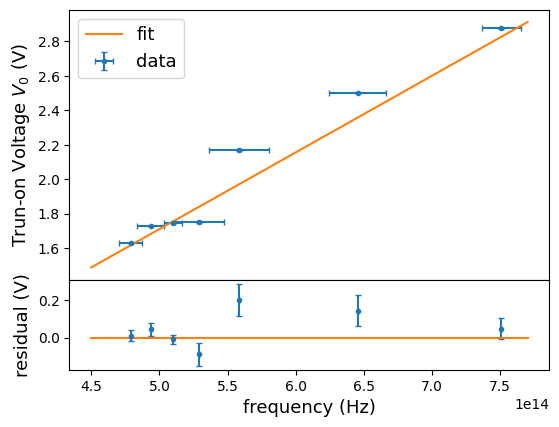

planck const:  7.123581282435024e-34
with error:  6.566240639168943e-35


In [285]:
final_plotter(w=[(1/i)**3 for i in f_err], name='method1.pdf')

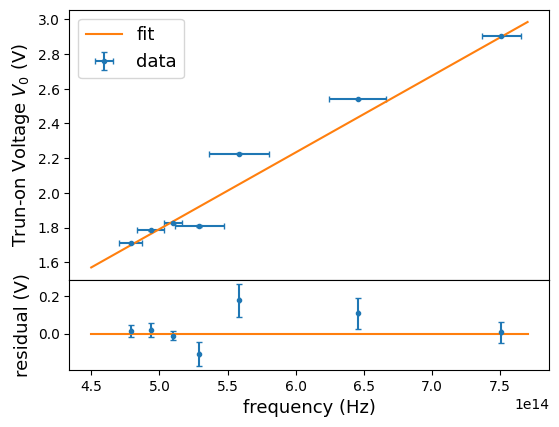

planck const:  7.071772293135048e-34
with error:  6.51290310887011e-35


In [286]:
final_plotter(v_arr=v_arr2, v_err=v_err2, w=[(1/i/j)**2 for i,j in zip(f_err,v_err2)], name='method2.pdf')

In [292]:
#purple with 0x02
data1 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 23, 24, 25, 26, 27, 28, 29, 30, 32, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 74, 75, 76, 77, 79, 80, 81, 82, 83, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 113, 114, 115, 117, 118, 119, 120, 121, 121, 122, 123, 123, 124, 125, 126, 127, 128, 128, 128, 129, 130, 130, 131, 132, 133, 133, 133, 134, 134, 134, 135, 136, 137, 137, 138, 139, 139, 139, 139, 140, 141, 141, 142, 143, 143, 144, 144, 144, 144, 145, 146, 147, 147, 148, 149, 149, 149, 149, 150, 151, 151, 152, 153, 153, 154, 154, 154, 154, 155, 156, 156, 157, 158, 158, 159, 159, 159, 160, 160, 161, 162, 162, 163, 163, 163, 164, 164, 165, 165, 166, 167, 167, 168, 168, 169, 169, 169, 170, 171, 171, 172, 172, 173, 173, 174, 174, 174, 175, 176, 176, 177, 177, 178, 178, 179, 179, 180, 180, 181, 181, 182, 182, 183, 183, 183, 184, 185, 185, 186, 186, 187, 187, 188, 188, 189, 189, 190, 190, 191, 191, 191, 192, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 60, 61, 62, 63, 65, 66, 67, 68, 69, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 99, 100, 101, 103, 104, 105, 106, 107, 108, 108, 109, 110, 112, 113, 114, 115, 116, 117, 117, 118, 119, 120, 121, 122, 123, 123, 123, 124, 124, 124, 125, 125, 125, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132]

#purple with 0x03
data2 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 14, 15, 16, 18, 18, 19, 20, 22, 22, 23, 25, 26, 26, 26, 29, 29, 30, 32, 33, 33, 34, 36, 37, 37, 38, 40, 40, 40, 44, 44, 44, 44, 47, 48, 48, 49, 51, 51, 51, 55, 55, 55, 56, 59, 59, 58, 61, 62, 62, 62, 66, 66, 66, 67, 70, 69, 69, 73, 73, 73, 73, 77, 77, 76, 79, 81, 80, 80, 84, 84, 84, 85, 88, 88, 87, 90, 92, 91, 91, 95, 95, 94, 96, 99, 98, 98, 102, 103, 102, 103, 107, 106, 105, 108, 110, 109, 109, 113, 113, 112, 114, 118, 117, 115, 119, 121, 120, 120, 124, 124, 122, 124, 127, 125, 125, 128, 129, 127, 129, 131, 130, 129, 132, 134, 132, 132, 135, 135, 133, 135, 138, 136, 136, 138, 140, 137, 139, 141, 141, 139, 141, 144, 142, 142, 144, 145, 143, 145, 147, 146, 145, 147, 150, 147, 148, 150, 151, 149, 151, 153, 152, 151, 153, 155, 152, 154, 156, 156, 155, 156, 158, 157, 157, 159, 161, 158, 160, 161, 161, 161, 162, 164, 162, 163, 165, 166, 164, 166, 167, 166, 166, 168, 169, 167, 169, 170, 171, 170, 171, 172, 171, 172, 174, 175, 173, 174, 176, 176, 176, 177, 178, 177, 178, 179, 180, 179, 180, 181, 181, 181, 182, 183, 183, 183, 184, 185, 185, 186, 186, 186, 187, 188, 188, 188, 189, 190, 190, 190, 191, 192, 192, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 10, 11, 12, 14, 14, 15, 16, 18, 18, 19, 21, 21, 22, 23, 25, 25, 26, 28, 29, 29, 30, 32, 32, 33, 34, 36, 36, 36, 39, 40, 40, 40, 43, 43, 44, 46, 47, 47, 47, 51, 51, 51, 52, 54, 54, 54, 57, 58, 58, 58, 62, 62, 62, 63, 66, 65, 65, 69, 69, 69, 70, 73, 73, 72, 75, 77, 76, 76, 80, 80, 80, 81, 84, 83, 83, 86, 87, 87, 87, 91, 91, 90, 93, 95, 94, 94, 98, 98, 98, 99, 103, 102, 101, 104, 106, 105, 105, 109, 109, 108, 110, 114, 113, 112, 115, 117, 116, 117, 120, 120, 119, 121, 123, 122, 122, 124, 124, 123, 124, 126, 125, 124, 126, 126, 126, 126, 127, 127, 126, 127, 127, 127, 127, 127, 128, 127, 127, 128, 128, 127, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 131, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 131, 132, 132, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132]

#purple with default divisor(0x04)
data3 = [0, 0, 1, 2, 3, 4, 5, 7, 8, 8, 9, 10, 11, 12, 14, 15, 16, 16, 17, 18, 18, 20, 22, 23, 24, 24, 25, 25, 26, 30, 30, 31, 31, 32, 32, 32, 37, 38, 38, 38, 39, 39, 39, 44, 45, 45, 46, 46, 46, 46, 50, 53, 53, 53, 53, 53, 53, 56, 60, 60, 60, 60, 60, 60, 62, 67, 68, 68, 67, 67, 67, 68, 73, 76, 75, 75, 75, 74, 75, 79, 83, 83, 82, 82, 81, 81, 85, 89, 91, 90, 89, 89, 88, 91, 95, 98, 97, 97, 96, 95, 98, 102, 106, 105, 104, 103, 102, 104, 108, 112, 113, 112, 111, 110, 111, 114, 118, 120, 119, 118, 117, 117, 120, 124, 127, 126, 124, 123, 122, 125, 128, 131, 131, 129, 128, 126, 129, 132, 135, 136, 134, 132, 130, 133, 135, 138, 140, 139, 137, 135, 136, 139, 141, 143, 143, 141, 139, 140, 142, 144, 147, 148, 145, 143, 143, 145, 148, 150, 152, 150, 147, 147, 149, 151, 153, 155, 155, 152, 150, 152, 154, 156, 158, 159, 156, 154, 156, 157, 159, 161, 162, 161, 158, 159, 161, 162, 164, 165, 165, 162, 163, 164, 166, 167, 168, 170, 166, 166, 168, 169, 170, 172, 173, 171, 170, 171, 172, 174, 175, 176, 175, 173, 175, 176, 177, 178, 179, 180, 177, 178, 179, 180, 181, 182, 183, 181, 182, 183, 184, 184, 185, 186, 185, 186, 186, 187, 188, 188, 189, 189, 189, 190, 191, 191, 192, 192, 0, 0, 1, 2, 3, 4, 5, 7, 7, 8, 9, 10, 11, 12, 14, 15, 16, 16, 17, 18, 18, 22, 22, 23, 23, 24, 24, 25, 28, 30, 30, 31, 31, 31, 32, 34, 37, 37, 38, 38, 38, 39, 40, 45, 45, 45, 45, 45, 46, 46, 51, 52, 53, 53, 53, 53, 52, 57, 60, 60, 60, 60, 60, 59, 64, 68, 67, 67, 67, 67, 67, 70, 74, 75, 75, 74, 74, 74, 76, 80, 83, 82, 82, 81, 81, 82, 86, 91, 90, 89, 88, 88, 89, 93, 97, 97, 97, 96, 95, 95, 99, 103, 105, 104, 103, 102, 101, 105, 109, 113, 112, 111, 110, 109, 112, 115, 119, 119, 118, 117, 116, 118, 121, 124, 124, 124, 123, 121, 122, 124, 126, 126, 126, 125, 124, 125, 126, 127, 127, 127, 127, 126, 126, 127, 127, 128, 128, 128, 127, 127, 127, 128, 128, 129, 128, 128, 128, 128, 128, 129, 129, 129, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 131, 131, 130, 130, 130, 131, 131, 131, 131, 131, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132]

#purple with 0x05
data4 = [0, 0, 1, 3, 3, 4, 5, 6, 8, 8, 10, 9, 12, 11, 13, 16, 15, 17, 16, 19, 17, 20, 24, 21, 25, 22, 26, 23, 27, 32, 28, 33, 29, 34, 30, 35, 38, 35, 41, 36, 41, 36, 42, 44, 42, 49, 42, 49, 43, 49, 50, 49, 57, 49, 56, 49, 56, 56, 56, 65, 56, 64, 56, 64, 62, 64, 71, 63, 72, 63, 71, 69, 71, 77, 70, 80, 69, 79, 75, 78, 83, 77, 88, 76, 87, 81, 85, 90, 84, 96, 83, 94, 88, 93, 96, 92, 104, 90, 102, 94, 100, 102, 99, 110, 97, 110, 101, 108, 108, 106, 116, 104, 118, 107, 116, 115, 113, 122, 111, 126, 114, 123, 120, 120, 127, 117, 132, 119, 129, 125, 125, 131, 122, 137, 123, 134, 129, 130, 135, 127, 140, 127, 139, 133, 135, 138, 131, 143, 131, 144, 137, 139, 141, 135, 146, 135, 149, 140, 144, 145, 139, 149, 139, 153, 144, 148, 148, 143, 152, 142, 156, 147, 153, 151, 148, 155, 146, 158, 150, 158, 154, 152, 158, 150, 161, 154, 162, 158, 156, 161, 154, 164, 158, 167, 161, 161, 164, 157, 167, 161, 170, 164, 165, 167, 161, 170, 165, 172, 168, 170, 170, 165, 173, 169, 175, 171, 174, 174, 170, 176, 172, 178, 175, 179, 177, 174, 179, 176, 181, 178, 182, 180, 178, 182, 180, 184, 182, 185, 184, 182, 185, 184, 187, 186, 188, 187, 186, 188, 188, 189, 189, 190, 190, 191, 192, 192, 0, 0, 1, 2, 3, 4, 5, 6, 8, 8, 10, 9, 12, 11, 13, 16, 14, 17, 16, 19, 17, 20, 24, 21, 25, 22, 26, 23, 27, 32, 28, 33, 29, 33, 30, 34, 40, 35, 40, 35, 41, 36, 41, 46, 42, 48, 42, 48, 42, 49, 52, 49, 56, 49, 56, 49, 56, 58, 56, 64, 56, 64, 56, 63, 64, 63, 72, 63, 71, 62, 71, 70, 70, 79, 70, 79, 69, 78, 76, 77, 85, 77, 87, 76, 86, 83, 85, 91, 84, 95, 83, 94, 89, 92, 97, 91, 103, 89, 101, 95, 100, 103, 98, 111, 96, 109, 102, 107, 110, 105, 117, 103, 117, 109, 115, 116, 112, 122, 110, 123, 115, 121, 121, 119, 125, 116, 126, 120, 125, 124, 123, 126, 121, 127, 123, 127, 126, 125, 127, 124, 128, 125, 128, 127, 127, 128, 126, 129, 126, 128, 128, 128, 128, 127, 129, 127, 129, 128, 128, 129, 128, 129, 128, 129, 129, 129, 129, 128, 130, 128, 130, 129, 129, 129, 129, 130, 129, 130, 129, 130, 130, 129, 130, 129, 130, 130, 130, 130, 130, 130, 130, 131, 130, 131, 130, 130, 131, 130, 131, 130, 131, 131, 130, 131, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 131, 131, 131, 131, 132, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132]

#purple with 0x06
data5 = [0, 0, 1, 3, 3, 4, 4, 7, 7, 7, 11, 11, 10, 9, 15, 14, 13, 20, 18, 16, 16, 23, 21, 18, 29, 25, 23, 22, 31, 27, 24, 37, 33, 29, 28, 39, 35, 30, 46, 41, 36, 35, 47, 41, 36, 55, 48, 42, 41, 56, 49, 43, 60, 56, 49, 48, 64, 56, 49, 66, 64, 56, 54, 72, 63, 55, 72, 72, 62, 61, 81, 70, 61, 79, 79, 69, 67, 89, 78, 68, 85, 87, 76, 74, 98, 85, 74, 91, 95, 83, 81, 106, 93, 81, 97, 104, 90, 87, 112, 100, 87, 103, 112, 97, 94, 118, 108, 94, 109, 120, 104, 101, 123, 115, 100, 115, 128, 110, 107, 128, 122, 105, 121, 135, 116, 112, 133, 128, 110, 126, 141, 121, 118, 137, 134, 115, 130, 146, 126, 122, 141, 139, 119, 134, 150, 131, 127, 144, 144, 123, 138, 152, 135, 131, 147, 149, 127, 142, 155, 139, 135, 150, 154, 131, 145, 158, 144, 139, 153, 159, 135, 148, 160, 148, 143, 156, 164, 139, 152, 163, 153, 147, 159, 168, 143, 155, 165, 157, 151, 162, 170, 147, 159, 168, 162, 155, 165, 172, 151, 162, 170, 167, 159, 168, 175, 156, 166, 173, 172, 163, 171, 177, 160, 169, 176, 176, 167, 174, 179, 165, 173, 178, 181, 172, 178, 182, 170, 177, 181, 184, 176, 181, 184, 176, 180, 184, 186, 180, 184, 186, 181, 184, 187, 188, 185, 187, 189, 186, 188, 189, 190, 189, 191, 191, 191, 192, 0, 0, 1, 3, 3, 4, 5, 7, 7, 7, 11, 11, 10, 11, 15, 14, 12, 20, 18, 16, 18, 23, 20, 18, 28, 25, 22, 24, 31, 27, 24, 37, 33, 29, 30, 39, 34, 30, 46, 40, 35, 37, 47, 41, 36, 55, 48, 42, 43, 55, 48, 42, 62, 55, 49, 49, 63, 55, 48, 68, 63, 55, 56, 72, 63, 55, 74, 71, 62, 62, 80, 70, 61, 80, 79, 69, 69, 89, 77, 67, 86, 87, 75, 75, 97, 85, 74, 92, 95, 82, 82, 106, 92, 80, 98, 103, 89, 89, 113, 100, 86, 104, 111, 96, 95, 119, 107, 93, 111, 119, 103, 102, 123, 114, 99, 116, 124, 110, 108, 126, 121, 105, 121, 127, 115, 114, 127, 125, 110, 125, 128, 120, 119, 128, 126, 114, 126, 129, 124, 123, 128, 128, 118, 127, 129, 126, 125, 129, 128, 122, 128, 130, 127, 126, 129, 129, 124, 128, 130, 128, 127, 129, 129, 126, 129, 130, 128, 128, 130, 130, 127, 129, 130, 129, 129, 130, 130, 127, 130, 131, 129, 129, 130, 131, 128, 130, 131, 130, 129, 130, 131, 129, 130, 131, 130, 130, 131, 131, 129, 130, 131, 131, 130, 131, 131, 130, 131, 131, 131, 131, 131, 131, 130, 131, 131, 131, 131, 131, 132, 131, 131, 132, 132, 131, 131, 132, 131, 131, 132, 132, 131, 132, 132, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132]

#purple with 0x07
data6 = [0, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 16, 28, 26, 24, 22, 20, 18, 16, 14, 13, 12, 10, 9, 8, 32, 58, 52, 46, 41, 36, 32, 28, 25, 22, 19, 17, 15, 13, 48, 78, 78, 68, 60, 53, 46, 41, 36, 31, 27, 24, 21, 30, 63, 90, 105, 92, 80, 70, 61, 53, 47, 41, 36, 31, 27, 47, 77, 103, 125, 115, 100, 87, 76, 66, 58, 50, 44, 38, 33, 63, 91, 115, 135, 138, 119, 103, 90, 78, 68, 59, 51, 44, 48, 79, 104, 126, 143, 156, 136, 118, 102, 89, 77, 67, 58, 50, 65, 93, 117, 136, 151, 162, 155, 132, 114, 99, 86, 74, 64, 56, 81, 107, 128, 145, 158, 167, 173, 147, 126, 109, 94, 82, 71, 69, 97, 120, 139, 153, 164, 171, 177, 163, 138, 119, 103, 89, 77, 87, 112, 133, 149, 160, 169, 175, 179, 181, 151, 129, 112, 97, 84, 104, 126, 144, 157, 166, 173, 178, 182, 185, 166, 140, 121, 105, 97, 120, 140, 154, 164, 172, 177, 181, 184, 186, 183, 153, 130, 113, 116, 136, 151, 163, 171, 177, 181, 184, 186, 188, 189, 167, 141, 121, 134, 150, 162, 170, 176, 181, 184, 186, 188, 189, 190, 182, 152, 135, 151, 162, 171, 177, 181, 184, 186, 188, 189, 190, 191, 191, 166, 156, 167, 174, 180, 183, 186, 188, 189, 190, 191, 191, 191, 192, 181, 178, 183, 186, 188, 190, 191, 191, 192, 192, 192, 0, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 18, 28, 26, 24, 21, 20, 18, 16, 14, 13, 12, 10, 9, 8, 34, 58, 51, 45, 40, 36, 32, 28, 25, 22, 19, 17, 15, 14, 49, 79, 77, 68, 60, 52, 46, 40, 35, 31, 27, 24, 21, 32, 64, 92, 104, 91, 79, 69, 61, 53, 46, 40, 35, 31, 27, 49, 79, 104, 124, 114, 99, 87, 75, 66, 57, 50, 43, 38, 33, 65, 92, 116, 127, 127, 118, 102, 89, 77, 67, 58, 51, 44, 50, 80, 105, 125, 129, 130, 127, 117, 101, 88, 76, 66, 57, 50, 67, 94, 118, 128, 129, 130, 130, 126, 113, 98, 85, 74, 64, 55, 83, 108, 126, 129, 130, 131, 131, 129, 124, 108, 94, 81, 70, 71, 98, 121, 128, 130, 131, 131, 131, 130, 127, 118, 102, 88, 77, 88, 113, 127, 129, 130, 131, 131, 132, 132, 129, 125, 111, 96, 83, 105, 125, 129, 130, 131, 131, 132, 132, 132, 131, 128, 120, 104, 98, 121, 128, 130, 131, 131, 131, 132, 132, 132, 132, 129, 126, 112, 117, 128, 129, 131, 131, 131, 132, 132, 132, 132, 132, 130, 128, 120, 127, 129, 130, 131, 131, 132, 132, 132, 132, 132, 132, 132, 129, 127, 129, 130, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 130, 130, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132]


data  1


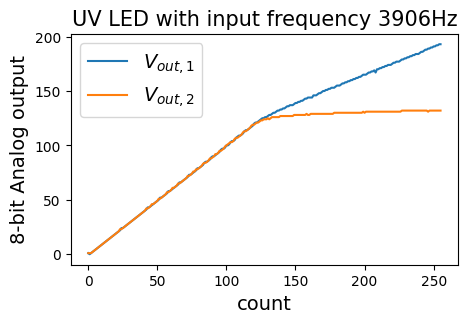

data  2


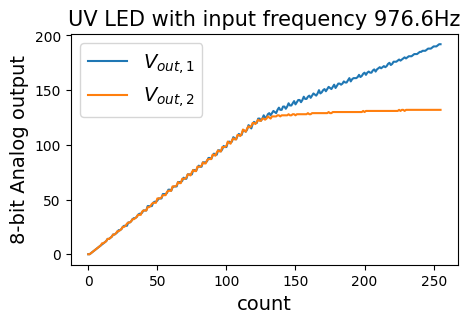

data  3


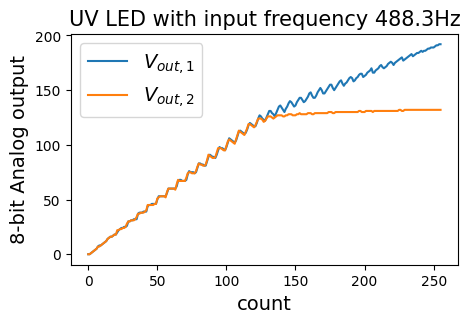

data  4


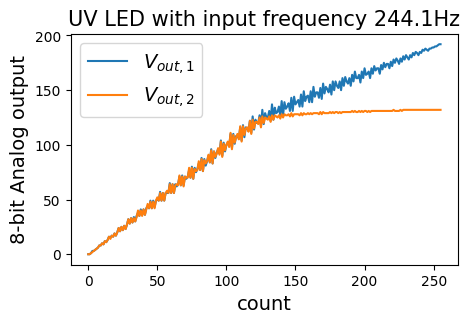

data  5


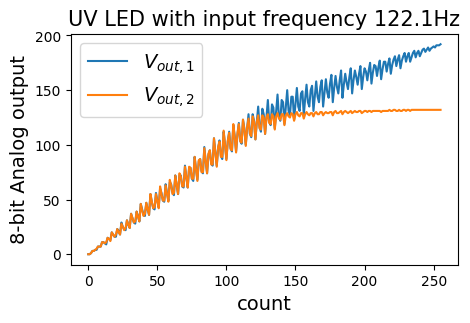

data  6


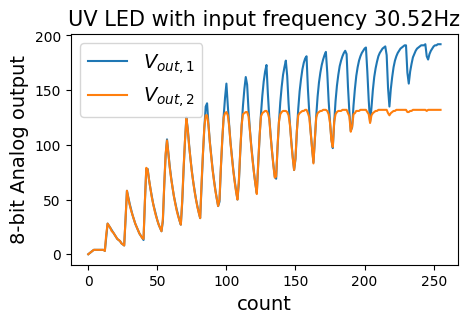

In [341]:
ds = [data1,data2,data3,data4,data5,data6]
fs = [3906, 976.6, 488.3, 244.1, 122.1, 30.52]

for i in range(len(ds)):
    out1, out2 = seperate_arr(ds[i])
    print('data ', (i+1))
    '''plt.plot(out1,np.array(out1)-np.array(out2))
    plt.show()'''
    g = plt.figure(figsize=(5,3))
    plt.plot(range(len(out1)), out1, label='$V_{out,1}$')
    plt.plot(range(len(out2)), out2, label='$V_{out,2}$')
    plt.xlabel('count', fontsize=14)
    plt.ylabel('8-bit Analog output', fontsize=14)
    plt.title('UV LED with input frequency '+str(fs[i])+'Hz', fontsize=15)
    plt.legend( fontsize=14)
    plt.savefig('freqs_plots/uv'+str(fs[i])+'.pdf', bbox_inches='tight')
    plt.show()

In [334]:
#purple without capacitor, 0x04
data3_0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 193, 0, 0, 0, 0, 0, 0, 193, 0, 0, 0, 0, 0, 0, 193, 0, 0, 0, 0, 0, 0, 0, 193, 0, 0, 0, 0, 0, 0, 193, 0, 0, 0, 0, 0, 0, 193, 0, 0, 0, 0, 0, 0, 193, 193, 0, 0, 0, 0, 0, 193, 193, 0, 0, 0, 0, 0, 193, 193, 0, 0, 0, 0, 0, 193, 193, 193, 0, 0, 0, 0, 189, 193, 193, 0, 0, 0, 0, 0, 193, 193, 0, 0, 0, 0, 0, 193, 193, 193, 0, 0, 0, 0, 193, 193, 193, 0, 0, 0, 0, 193, 193, 193, 0, 0, 0, 0, 193, 193, 193, 193, 0, 0, 0, 193, 193, 193, 193, 0, 0, 0, 189, 193, 193, 193, 0, 0, 0, 0, 193, 193, 193, 193, 0, 0, 0, 193, 193, 193, 193, 0, 0, 0, 193, 193, 193, 193, 0, 0, 0, 193, 193, 193, 193, 193, 0, 0, 193, 193, 193, 193, 193, 0, 0, 193, 193, 193, 193, 193, 193, 0, 189, 193, 193, 193, 193, 193, 0, 0, 193, 193, 193, 193, 193, 0, 0, 193, 193, 193, 193, 193, 193, 0, 193, 193, 193, 193, 193, 193, 0, 193, 193, 193, 193, 193, 193, 0, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 189, 193, 193, 193, 193, 193, 193, 0, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 0, 0, 0, 0, 0, 0, 132, 0, 0, 0, 0, 0, 0, 132, 0, 0, 0, 0, 0, 0, 132, 132, 0, 0, 0, 0, 0, 0, 132, 0, 0, 0, 0, 0, 0, 132, 0, 0, 0, 0, 0, 0, 132, 132, 0, 0, 0, 0, 0, 132, 132, 0, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 132, 132, 132, 132, 0, 0, 0, 132, 132, 132, 132, 0, 0, 0, 132, 132, 132, 132, 0, 0, 0, 132, 132, 132, 132, 132, 0, 0, 132, 132, 132, 132, 132, 0, 0, 0, 132, 132, 132, 132, 0, 0, 0, 132, 132, 132, 132, 132, 0, 0, 132, 132, 132, 132, 132, 0, 0, 132, 132, 132, 132, 132, 0, 0, 132, 132, 132, 132, 132, 132, 0, 132, 132, 132, 132, 132, 132, 0, 0, 132, 132, 132, 132, 132, 0, 0, 132, 132, 132, 132, 132, 132, 0, 132, 132, 132, 132, 132, 132, 0, 132, 132, 132, 132, 132, 132, 0, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132]

#purple without capacitor, 0x07
data6_0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 193, 193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 193, 193, 193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 193, 193, 193, 193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 193, 193, 193, 193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 193, 193, 193, 193, 193, 193, 0, 0, 0, 0, 0, 0, 0, 0, 193, 193, 193, 193, 193, 193, 0, 0, 0, 0, 0, 0, 0, 0, 193, 193, 193, 193, 193, 193, 193, 0, 0, 0, 0, 0, 0, 193, 193, 193, 193, 193, 193, 193, 193, 0, 0, 0, 0, 0, 0, 193, 193, 193, 193, 193, 193, 193, 193, 0, 0, 0, 0, 0, 0, 193, 193, 193, 193, 193, 193, 193, 193, 193, 0, 0, 0, 0, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 0, 0, 0, 0, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 0, 0, 0, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 0, 0, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 0, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 0, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 132, 132, 132, 0, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 132, 132, 132, 0, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 132, 132, 132, 0, 0, 0, 0, 0, 0, 0, 132, 132, 132, 132, 132, 132, 132, 132, 0, 0, 0, 0, 0, 0, 132, 132, 132, 132, 132, 132, 132, 132, 0, 0, 0, 0, 0, 0, 132, 132, 132, 132, 132, 132, 132, 132, 132, 0, 0, 0, 0, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 0, 0, 0, 0, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 0, 0, 0, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 0, 0, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 0, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 0, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132]

#purple with 33uF, 0x01
data1 = [1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 43, 44, 45, 46, 47, 48, 49, 50, 52, 52, 53, 54, 55, 56, 58, 58, 59, 60, 61, 62, 63, 64, 66, 66, 67, 68, 69, 70, 71, 73, 73, 74, 75, 76, 77, 79, 79, 80, 81, 82, 84, 85, 85, 86, 87, 89, 90, 90, 91, 92, 93, 94, 96, 97, 97, 98, 100, 100, 101, 103, 104, 104, 105, 107, 108, 109, 109, 110, 111, 113, 114, 114, 115, 116, 117, 118, 120, 121, 121, 122, 123, 124, 125, 125, 126, 126, 127, 128, 128, 129, 130, 130, 131, 132, 132, 133, 133, 134, 134, 135, 136, 136, 137, 137, 137, 138, 139, 139, 140, 140, 141, 141, 142, 143, 143, 144, 144, 144, 144, 146, 146, 146, 147, 148, 148, 149, 150, 150, 151, 151, 152, 152, 153, 153, 153, 154, 155, 155, 155, 156, 157, 157, 158, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 164, 165, 165, 165, 166, 167, 167, 168, 168, 169, 167, 170, 170, 171, 171, 172, 172, 173, 173, 174, 174, 174, 175, 176, 176, 177, 177, 177, 178, 179, 179, 180, 180, 181, 181, 182, 182, 183, 183, 184, 184, 184, 185, 186, 186, 187, 188, 188, 189, 189, 190, 190, 191, 191, 192, 192, 193, 193, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 42, 43, 44, 46, 46, 47, 48, 49, 51, 51, 52, 53, 54, 55, 57, 57, 58, 59, 61, 61, 62, 63, 65, 65, 66, 67, 68, 69, 70, 72, 72, 73, 74, 76, 76, 78, 78, 79, 80, 81, 83, 84, 84, 85, 86, 88, 88, 89, 90, 92, 92, 93, 95, 95, 96, 97, 99, 100, 101, 102, 103, 103, 104, 106, 107, 107, 108, 109, 110, 112, 113, 113, 114, 115, 116, 118, 119, 119, 120, 121, 121, 122, 123, 123, 124, 124, 124, 125, 124, 125, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 131, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132]

#purple with 33uF, 0x04
data3_33 = [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 14, 15, 16, 17, 18, 19, 20, 22, 22, 23, 24, 25, 26, 27, 29, 29, 30, 31, 32, 33, 33, 36, 37, 37, 38, 39, 39, 40, 43, 44, 44, 45, 46, 47, 47, 50, 51, 52, 52, 53, 54, 54, 56, 59, 59, 60, 60, 61, 61, 63, 65, 66, 67, 67, 68, 68, 70, 72, 73, 74, 74, 75, 75, 77, 79, 81, 81, 81, 82, 82, 83, 86, 88, 88, 89, 89, 89, 90, 92, 94, 96, 96, 96, 96, 97, 99, 101, 103, 103, 103, 104, 104, 106, 108, 110, 111, 111, 111, 111, 113, 115, 117, 118, 118, 118, 118, 119, 121, 123, 125, 124, 124, 124, 125, 126, 128, 129, 129, 129, 129, 129, 130, 132, 133, 134, 133, 133, 132, 134, 136, 137, 138, 137, 137, 136, 138, 139, 140, 142, 142, 141, 140, 141, 143, 144, 145, 146, 145, 144, 145, 146, 148, 149, 150, 149, 148, 149, 150, 151, 152, 153, 153, 152, 152, 153, 155, 156, 157, 158, 156, 156, 157, 158, 159, 160, 161, 160, 159, 161, 162, 163, 163, 164, 164, 163, 164, 165, 166, 167, 168, 169, 167, 168, 169, 170, 170, 171, 172, 171, 171, 172, 173, 174, 175, 175, 175, 175, 176, 177, 177, 178, 179, 179, 179, 180, 180, 181, 181, 182, 183, 182, 183, 184, 184, 185, 186, 186, 186, 187, 187, 188, 189, 189, 190, 190, 190, 191, 192, 192, 193, 193, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 21, 22, 23, 24, 25, 26, 28, 29, 29, 30, 31, 32, 32, 34, 36, 36, 37, 38, 39, 39, 41, 43, 44, 44, 45, 46, 46, 48, 50, 51, 52, 52, 53, 53, 54, 57, 58, 59, 59, 60, 60, 61, 64, 66, 66, 66, 67, 67, 68, 70, 73, 73, 74, 74, 75, 75, 77, 79, 80, 81, 81, 82, 82, 84, 86, 88, 88, 88, 89, 89, 90, 93, 95, 95, 96, 96, 96, 97, 100, 102, 103, 103, 103, 103, 104, 106, 108, 110, 110, 110, 110, 111, 113, 115, 117, 117, 117, 118, 118, 120, 121, 123, 123, 123, 123, 123, 124, 124, 125, 126, 125, 125, 125, 125, 126, 126, 127, 127, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 130, 129, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132]

#purple with 33uF, 0x07
data6_33 = [0, 1, 2, 3, 3, 4, 5, 5, 6, 6, 7, 7, 8, 13, 18, 18, 18, 18, 19, 19, 18, 18, 18, 18, 18, 18, 17, 27, 38, 36, 35, 35, 34, 33, 32, 31, 31, 30, 29, 28, 28, 42, 54, 55, 53, 51, 49, 48, 46, 44, 43, 42, 40, 39, 43, 55, 67, 73, 70, 67, 65, 62, 60, 58, 56, 53, 52, 50, 58, 69, 80, 90, 88, 84, 80, 77, 74, 71, 68, 65, 63, 61, 72, 83, 93, 102, 106, 101, 96, 92, 88, 85, 81, 78, 74, 76, 87, 97, 106, 115, 123, 118, 112, 107, 102, 98, 94, 90, 86, 91, 101, 110, 119, 126, 134, 133, 126, 120, 115, 110, 104, 100, 95, 105, 114, 122, 129, 136, 142, 148, 139, 132, 125, 119, 114, 108, 107, 116, 125, 132, 139, 145, 150, 154, 151, 142, 135, 128, 122, 116, 119, 127, 135, 141, 147, 152, 156, 160, 162, 152, 143, 136, 129, 123, 130, 137, 143, 149, 154, 158, 162, 165, 168, 162, 152, 144, 136, 132, 140, 146, 151, 156, 160, 164, 167, 170, 172, 172, 161, 152, 143, 143, 149, 155, 159, 163, 166, 169, 172, 174, 176, 178, 170, 160, 151, 154, 159, 163, 167, 170, 173, 175, 177, 179, 181, 182, 180, 168, 160, 165, 169, 172, 175, 177, 179, 181, 182, 184, 185, 186, 187, 177, 173, 176, 179, 181, 182, 184, 185, 187, 187, 188, 189, 190, 190, 186, 185, 187, 188, 189, 190, 191, 192, 192, 193, 193, 0, 1, 2, 3, 3, 4, 5, 5, 6, 6, 7, 7, 8, 14, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 28, 38, 36, 35, 34, 34, 33, 32, 31, 30, 30, 29, 28, 28, 42, 54, 55, 53, 51, 49, 47, 46, 44, 43, 41, 40, 39, 43, 56, 67, 73, 70, 67, 65, 62, 60, 58, 55, 53, 51, 50, 58, 70, 81, 90, 87, 84, 80, 77, 74, 71, 68, 65, 63, 60, 73, 84, 94, 103, 105, 100, 96, 92, 88, 84, 81, 77, 74, 76, 87, 97, 107, 115, 122, 117, 112, 107, 102, 98, 93, 89, 85, 92, 102, 111, 119, 125, 127, 126, 124, 120, 114, 109, 104, 100, 95, 105, 114, 122, 126, 127, 128, 129, 128, 126, 124, 119, 113, 108, 108, 117, 124, 127, 128, 129, 129, 130, 129, 128, 127, 125, 121, 116, 119, 125, 127, 128, 129, 129, 130, 130, 130, 129, 128, 127, 125, 122, 126, 128, 128, 129, 130, 130, 130, 131, 131, 130, 129, 128, 127, 127, 128, 129, 129, 130, 130, 130, 131, 131, 131, 131, 130, 129, 128, 128, 129, 130, 130, 130, 131, 131, 131, 131, 131, 131, 131, 130, 129, 130, 130, 130, 131, 131, 131, 131, 131, 132, 132, 132, 131, 131, 130, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132]

data  1


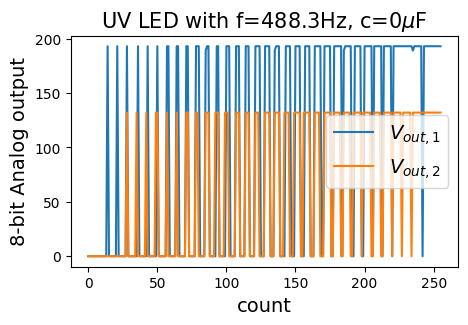

data  2


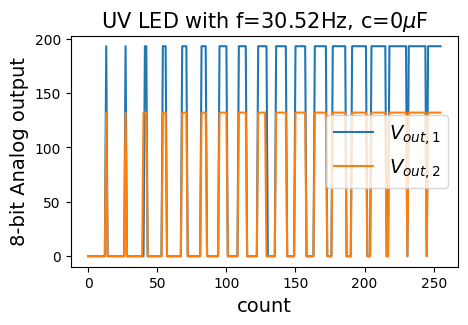

data  3


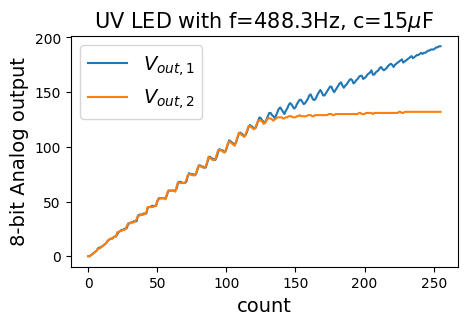

data  4


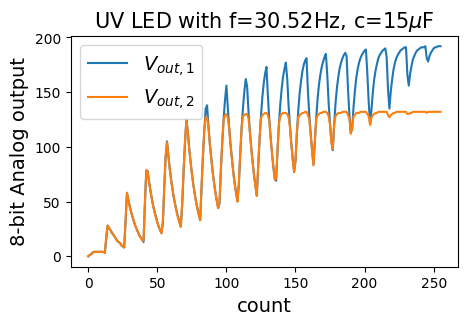

data  5


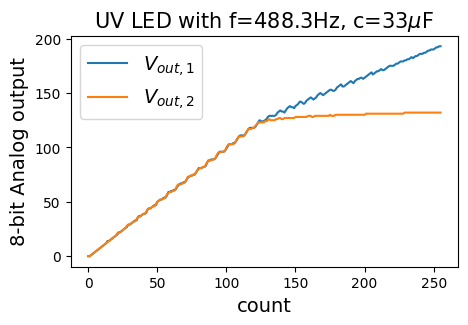

data  6


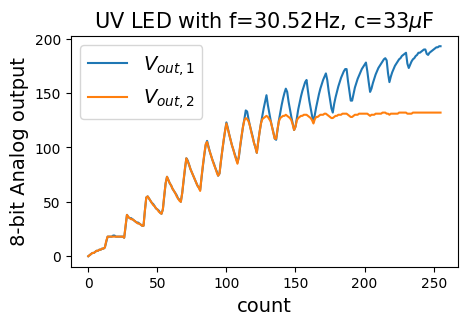

In [340]:
ds = [data3_0, data6_0,data3,data6, data3_33, data6_33]
fs = [488.3,30.52,488.3,30.52,488.3,30.52]
cs = [0,0,15,15,33,33]

for i in range(len(ds)):
    out1, out2 = seperate_arr(ds[i])
    print('data ', (i+1))
    '''plt.plot(out1,np.array(out1)-np.array(out2))
    plt.show()'''
    g = plt.figure(figsize=(5,3))
    plt.plot(range(len(out1)), out1, label='$V_{out,1}$')
    plt.plot(range(len(out2)), out2, label='$V_{out,2}$')
    plt.xlabel('count', fontsize=14)
    plt.ylabel('8-bit Analog output', fontsize=14)
    plt.title('UV LED with f='+str(fs[i])+'Hz, c='+str(cs[i])+'$\mu$F', fontsize=15)
    plt.legend( fontsize=14)
    plt.savefig('freqs_plots/uv_'+str(fs[i])+'_'+str(cs[i])+'.pdf', bbox_inches='tight')
    plt.show()